In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize

df = pd.read_csv('data.csv')
print(df.columns)
Y = df['MEDV']
X = df[['RM', 'AGE']]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


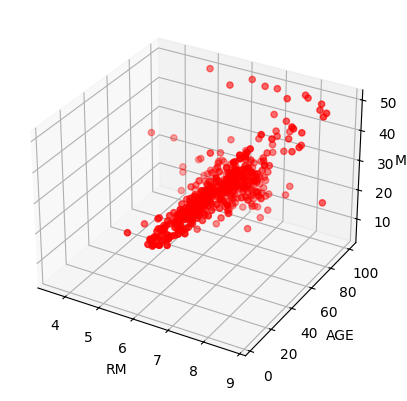

In [2]:
#print(X.head())
#print(y.head())
#plot 3D graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['RM'], X['AGE'], Y, c='r', marker='o')
ax.set_xlabel('RM')
ax.set_ylabel('AGE')
ax.set_zlabel('MEDV')
plt.show()

In [3]:
def mean_absolute_percentage_error(y_pred, y_true, sample_weights=None):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    assert len(y_true) == len(y_pred)
    
    if np.any(y_true==0):
        print("Found zeroes in y_true. MAPE undefined. Removing from set...")
        idx = np.where(y_true==0)
        y_true = np.delete(y_true, idx)
        y_pred = np.delete(y_pred, idx)
        if type(sample_weights) != type(None):
            sample_weights = np.array(sample_weights)
            sample_weights = np.delete(sample_weights, idx)
        
    if type(sample_weights) == type(None):
        return(np.mean(np.abs((y_true - y_pred) / y_true)) * 100)
    else:
        sample_weights = np.array(sample_weights)
        assert len(sample_weights) == len(y_true)
        return(100/sum(sample_weights)*np.dot(
                sample_weights, (np.abs((y_true - y_pred) / y_true))
        ))
    
loss_function = mean_absolute_percentage_error

[ 8.40158122 -0.07277679]
-25.277399052976993


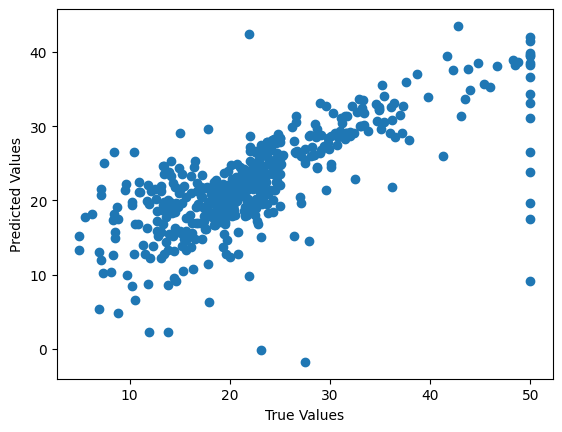

In [4]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X, Y)
print(lm.coef_)
print(lm.intercept_)
#print(lm.score(X, Y))
loss_function(lm.predict(X), Y)
plt.scatter(Y, lm.predict(X))
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()


In [5]:
def objective_function(beta, X, Y):
    error = loss_function(np.matmul(X,beta), Y)
    return(error)

# Add an intercept column to the model.
X = np.abs(np.concatenate((np.ones((X.shape[0],1)), X), axis=1))

# You must provide a starting point at which to initialize
# the parameter search space
beta_init = np.array([1]*X.shape[1])
result = minimize(objective_function, beta_init, args=(X,Y),
                  method='BFGS', options={'maxiter': 500})

# The optimal values for the input parameters are stored
# in result.x
beta_hat = result.x
print(beta_hat)
#print(result)
loss_function(np.matmul(X,beta_hat), Y)

[-10.02861977   6.0315239   -0.10227906]


21.58567673241764

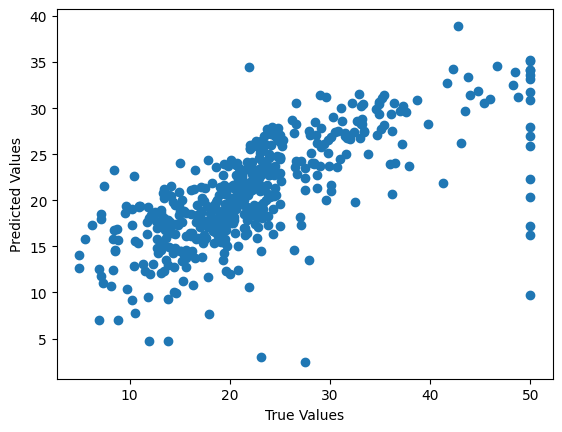

In [6]:
loss_function(np.matmul(X,beta_hat), Y)
# scatter plot
plt.scatter(Y, np.matmul(X,beta_hat))
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()